In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import random
random.seed(42)
np.random.seed(42)

In [12]:
gistic = pd.read_csv('gisticBoth.csv', delimiter = '\t', index_col=0)
gistic

,ENSG00000008128.21,ENSG00000008130.14,ENSG00000067606.14,ENSG00000078369.16,ENSG00000078808.15,ENSG00000107404.16,ENSG00000116151.12,ENSG00000127054.17,ENSG00000131584.17,ENSG00000131591.16,...,ENSG00000268651.2,ENSG00000274183.1,ENSG00000274791.1,ENSG00000277150.1,ENSG00000277203.1,ENSG00000277745.1,ENSG00000277858.1,ENSG00000124333.13,ENSG00000124334.15,ENSG00000168939.9
TCGA-DS-A0VK-01A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-DS-A0VM-01A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-DS-A0VN-01A,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
TCGA-DS-A0VL-01A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BI-A0VR-01A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-DI-A1NN-01A,0,0,0,0,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
TCGA-EC-A1QX-01A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-EC-A24G-01A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BG-A2AE-01A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
gisticLabel = pd.read_csv('gisticBothLabel.csv', delimiter = '\t', index_col=0)

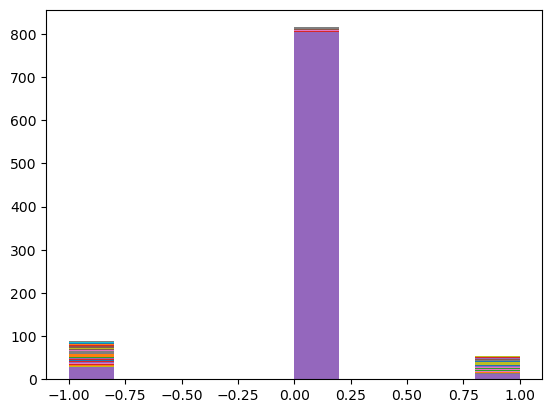

In [14]:
for i in range(845):
    plt.hist(gistic.iloc[:, [i]])

In [15]:
# # standard scaling
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# gistic = pd.DataFrame(scaler.fit_transform(gistic.values), columns=gistic.columns, index=gistic.index)
# gistic

In [16]:
# for i in range(845):
#     plt.hist(gistic.iloc[:, [i]])

In [17]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(gistic, gisticLabel, test_size=0.1, stratify=gisticLabel, random_state=42)
# stratified!!!

In [18]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.005)
lasso_reg.fit(X_train, y_train)
lassoData = pd.DataFrame(lasso_reg.coef_)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(lassoData)
    
criteria = lassoData[lassoData[0] > 0]
# print(criteria)
# criteria = criteria[0].nlargest(n=10)

gistic = gistic.iloc[:, criteria.index]

                  0
0     -0.000000e+00
1     -0.000000e+00
2     -0.000000e+00
3     -0.000000e+00
4     -0.000000e+00
5     -0.000000e+00
6     -0.000000e+00
7     -0.000000e+00
8     -0.000000e+00
9     -0.000000e+00
10    -0.000000e+00
11    -0.000000e+00
12    -0.000000e+00
13    -0.000000e+00
14    -0.000000e+00
15    -0.000000e+00
16    -0.000000e+00
17    -0.000000e+00
18    -0.000000e+00
19    -0.000000e+00
20    -0.000000e+00
21    -0.000000e+00
22    -0.000000e+00
23    -0.000000e+00
24    -0.000000e+00
25    -0.000000e+00
26    -0.000000e+00
27    -0.000000e+00
28    -0.000000e+00
29    -0.000000e+00
30    -0.000000e+00
31    -0.000000e+00
32    -0.000000e+00
33    -0.000000e+00
34    -0.000000e+00
35    -0.000000e+00
36    -0.000000e+00
37    -0.000000e+00
38    -0.000000e+00
39    -0.000000e+00
40    -0.000000e+00
41    -0.000000e+00
42    -0.000000e+00
43    -0.000000e+00
44    -0.000000e+00
45    -0.000000e+00
46    -0.000000e+00
47    -0.000000e+00
48    -0.000000e+00


In [19]:
numCol = gistic.shape[1]
numCol

77

In [20]:
gistic

,ENSG00000158062.19,ENSG00000169442.7,ENSG00000142698.13,ENSG00000115520.7,ENSG00000144381.15,ENSG00000115541.9,ENSG00000115540.13,ENSG00000174928.14,ENSG00000169359.12,ENSG00000250588.5,...,ENSG00000178605.11,ENSG00000182162.8,ENSG00000182378.11,ENSG00000185291.9,ENSG00000185960.11,ENSG00000196433.10,ENSG00000197976.9,ENSG00000124333.13,ENSG00000124334.15,ENSG00000168939.9
TCGA-DS-A0VK-01A,0,0,0,0,0,0,0,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
TCGA-DS-A0VM-01A,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,0,0
TCGA-DS-A0VN-01A,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-DS-A0VL-01A,0,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
TCGA-BI-A0VR-01A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-DI-A1NN-01A,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,-1,-1,-1
TCGA-EC-A1QX-01A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-EC-A24G-01A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BG-A2AE-01A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(gistic, gisticLabel, test_size=0.1, stratify=gisticLabel, random_state=42)
# stratified!!!

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import NearestCentroid

LR: 0.727759 (0.031716)


  0%|          | 0/85 [00:00<?, ?it/s]

Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 24 iterations, alpha=1.755e-03, previous alpha=1.752e-03, with an active set of 19 regressors.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


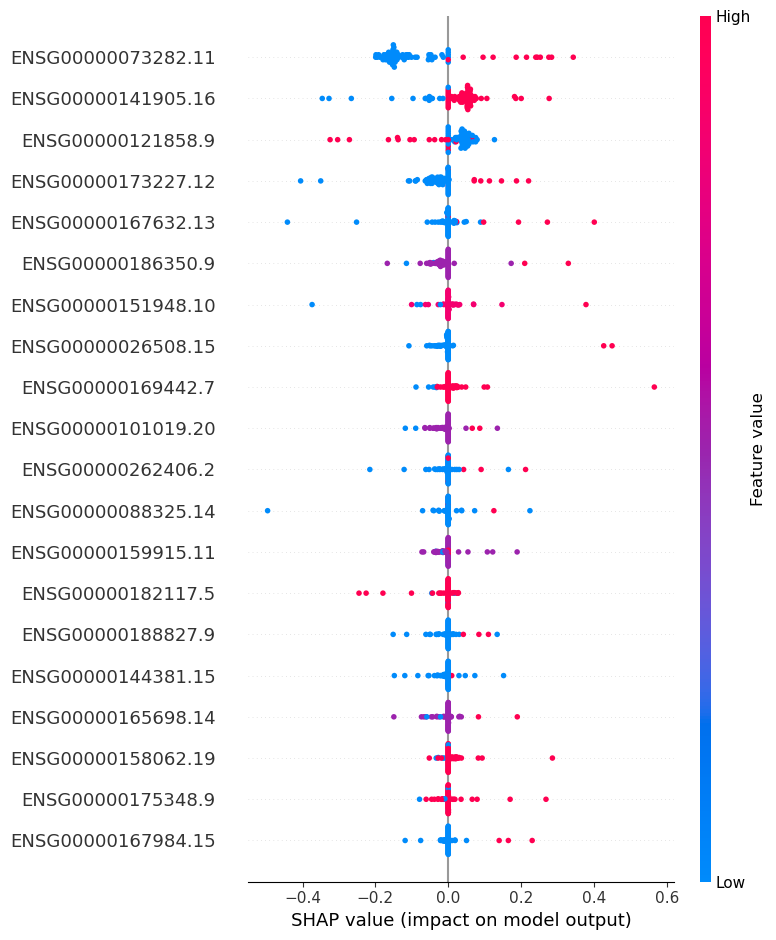

              col_name  feature_importance_vals
11  ENSG00000073282.11                 0.133840
56  ENSG00000141905.16                 0.060572
10   ENSG00000121858.9                 0.052219
38  ENSG00000173227.12                 0.043438
28  ENSG00000167632.13                 0.026888
..                 ...                      ...
64  ENSG00000078804.11                 0.003655
15  ENSG00000071539.12                 0.003625
68   ENSG00000182162.8                 0.003532
73   ENSG00000197976.9                 0.003519
59   ENSG00000105193.7                 0.002653

[77 rows x 2 columns]
sum shap 0.9298364426658483
sum shap 1.0000000000000002
[0.14393922115870833, 0.06514262697162454, 0.056159715433087565, 0.046715734334139385, 0.02891716944657724, 0.02605132744570046, 0.021176424822056707, 0.01940545400395649, 0.018486482039831467, 0.016406643776761192, 0.016222702434437984, 0.016168394117271105, 0.01477674664218418, 0.013881869509176763, 0.013781100100256112, 0.01348506524015382,

  0%|          | 0/85 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


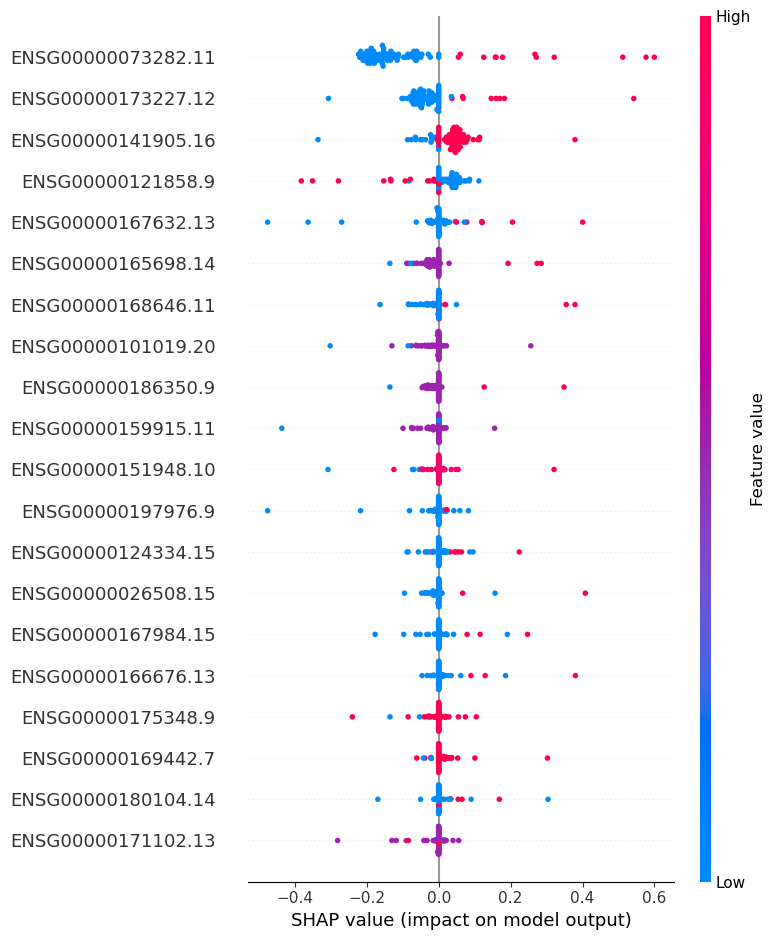

              col_name  feature_importance_vals
11  ENSG00000073282.11                 0.159057
38  ENSG00000173227.12                 0.054287
56  ENSG00000141905.16                 0.050565
10   ENSG00000121858.9                 0.048497
28  ENSG00000167632.13                 0.033921
..                 ...                      ...
17   ENSG00000112877.7                 0.004096
23  ENSG00000188818.11                 0.003976
68   ENSG00000182162.8                 0.003830
27  ENSG00000204574.11                 0.003578
26  ENSG00000204576.10                 0.001174

[77 rows x 2 columns]
sum shap 1.0246804423796383
sum shap 1.0000000000000002
[0.1552261871474739, 0.05297933425506018, 0.049346946070046666, 0.047328743729151614, 0.033103629500471764, 0.026856654124776915, 0.021548340317654655, 0.017851895258262026, 0.017820831183372045, 0.016328669641307355, 0.015799070030390425, 0.014945922218500605, 0.014624054369114188, 0.014411997425460453, 0.01421855004634528, 0.0130406186546956

  0%|          | 0/85 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


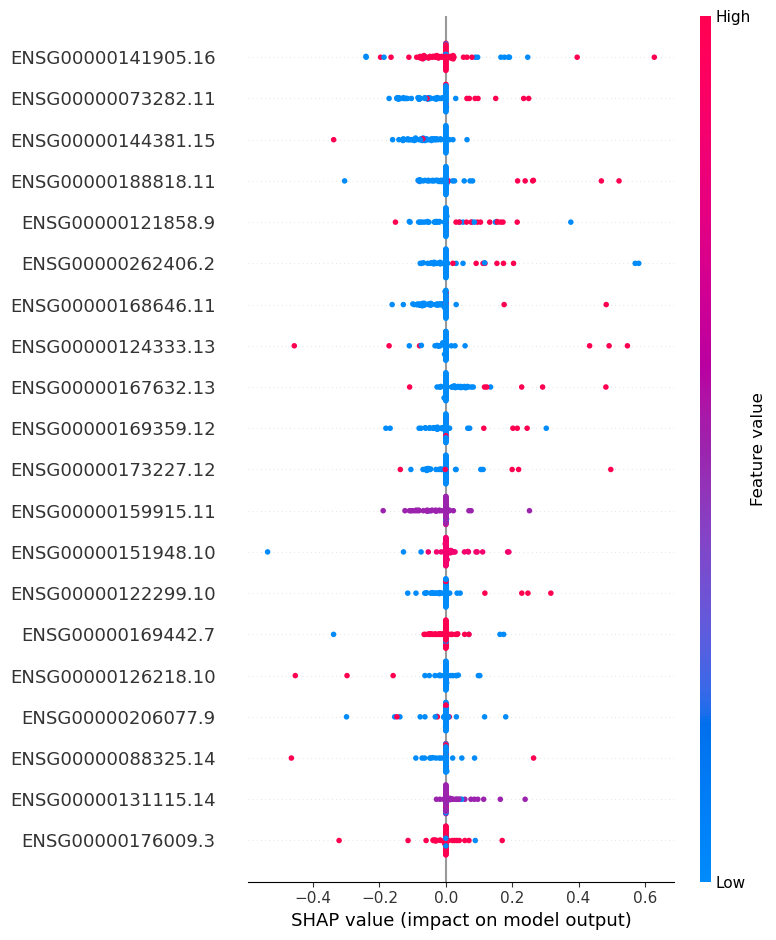

              col_name  feature_importance_vals
56  ENSG00000141905.16                 0.056721
11  ENSG00000073282.11                 0.048643
4   ENSG00000144381.15                 0.045058
23  ENSG00000188818.11                 0.040504
10   ENSG00000121858.9                 0.037755
..                 ...                      ...
65  ENSG00000101019.20                 0.004368
48  ENSG00000167984.15                 0.003891
27  ENSG00000204574.11                 0.003520
59   ENSG00000105193.7                 0.003404
12  ENSG00000028310.16                 0.003109

[77 rows x 2 columns]
sum shap 1.0524522563756087
sum shap 0.9999999999999996
[0.05389459466427918, 0.04621853201064813, 0.0428123835369436, 0.03848560273059172, 0.03587343972746884, 0.03218299856736498, 0.030991123726139398, 0.029104771213020054, 0.02899164197878954, 0.02571384584218664, 0.02341024424342527, 0.023313569373844375, 0.02096588525877294, 0.0192276620349505, 0.01810638175027257, 0.01633480664928478, 0.01499

[04:12:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


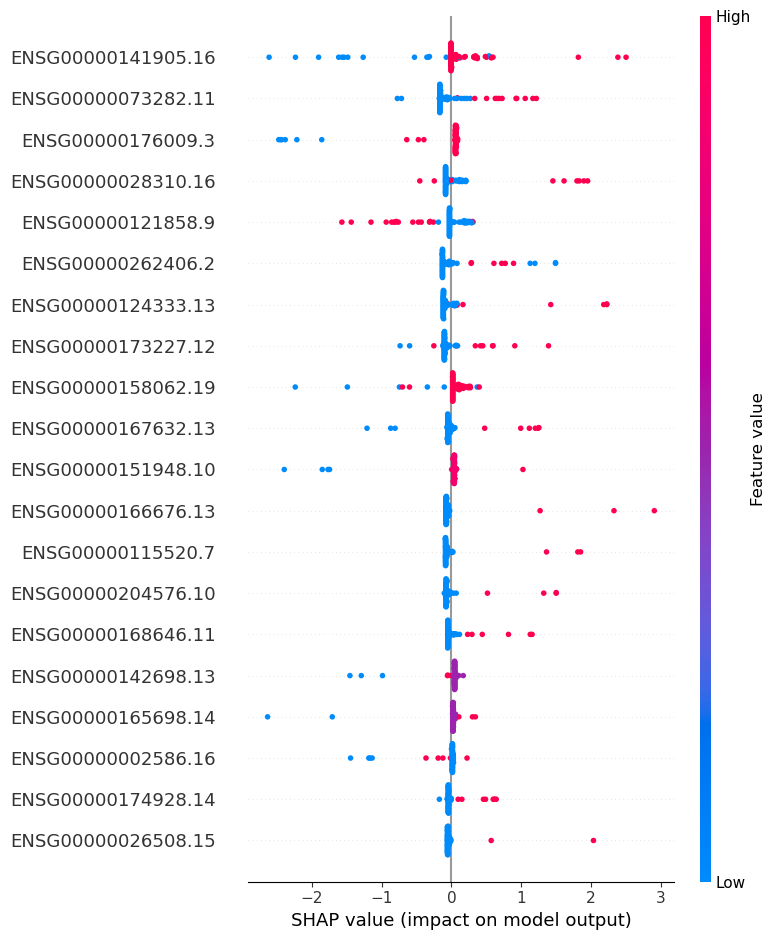

              col_name  feature_importance_vals
56  ENSG00000141905.16                 0.355179
11  ENSG00000073282.11                 0.241220
34   ENSG00000176009.3                 0.236215
12  ENSG00000028310.16                 0.209692
10   ENSG00000121858.9                 0.204355
..                 ...                      ...
4   ENSG00000144381.15                 0.000000
8   ENSG00000169359.12                 0.000000
44  ENSG00000126231.12                 0.000000
45  ENSG00000126226.20                 0.000000
76   ENSG00000168939.9                 0.000000

[77 rows x 2 columns]
sum shap 3.8049850452225655
sum shap 1.0000000000000002
[0.09334581472277105, 0.06339581200671597, 0.06208039655231763, 0.05510986833535, 0.05370714857290674, 0.05098812829018716, 0.049106345082065, 0.040768225602324994, 0.03875863653168787, 0.03807285537640725, 0.03741390033291542, 0.03729612782783153, 0.03410244201527814, 0.031834411750155986, 0.02378705599244099, 0.02373554789969614, 0.022382150

  0%|          | 0/85 [00:00<?, ?it/s]

Regressors in active set degenerate. Dropping a regressor, after 12 iterations, i.e. alpha=1.444e-02, with an active set of 12 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 71 iterations, alpha=2.761e-03, previous alpha=2.690e-03, with an active set of 40 regressors.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 57 iterations, alpha=1.180e-04, previous alpha=1.180e-04, with an active set of 40 regressors.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


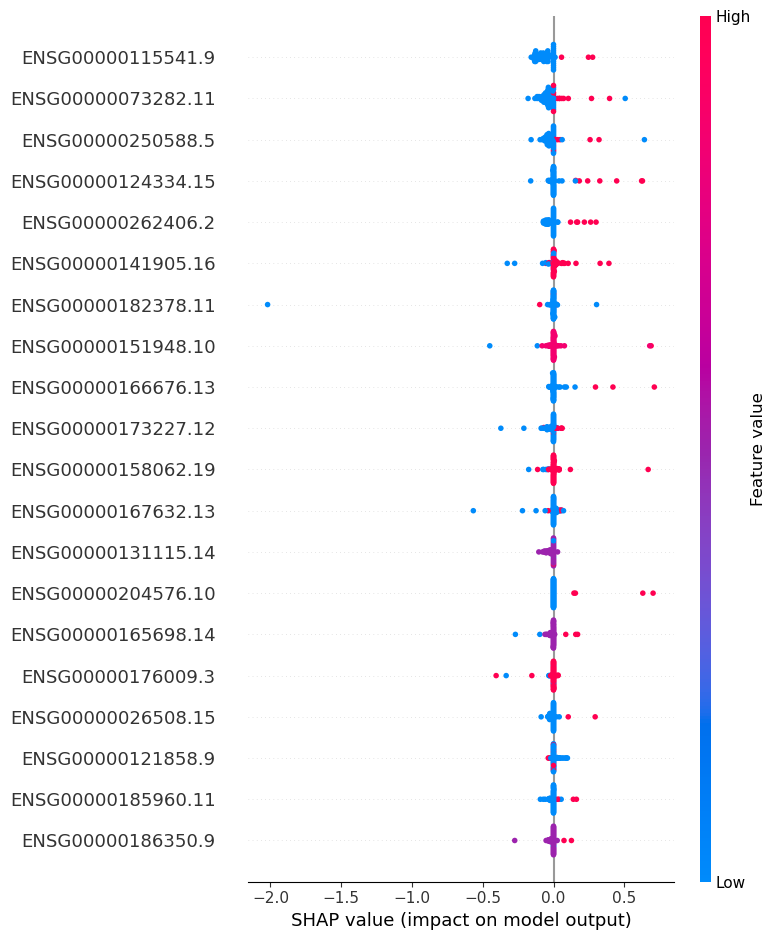

              col_name  feature_importance_vals
5    ENSG00000115541.9                 0.078469
11  ENSG00000073282.11                 0.055270
9    ENSG00000250588.5                 0.040942
75  ENSG00000124334.15                 0.038716
39   ENSG00000262406.2                 0.038430
..                 ...                      ...
32  ENSG00000171102.13                 0.002580
64  ENSG00000078804.11                 0.002478
43  ENSG00000126218.10                 0.002476
72  ENSG00000196433.10                 0.002040
27  ENSG00000204574.11                 0.000000

[77 rows x 2 columns]
sum shap 0.8908716773881248
sum shap 0.9999999999999998
[0.08808108056069743, 0.062040772906111624, 0.04595718783611663, 0.04345806425563453, 0.043137232605597854, 0.03499730645615642, 0.03458027571574005, 0.03373125213709963, 0.027955294359798842, 0.026249339891605578, 0.02445263674740774, 0.024236945173065187, 0.0236691257496548, 0.021571013328405088, 0.017956996848713738, 0.016352744230454786, 0

  0%|          | 0/85 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


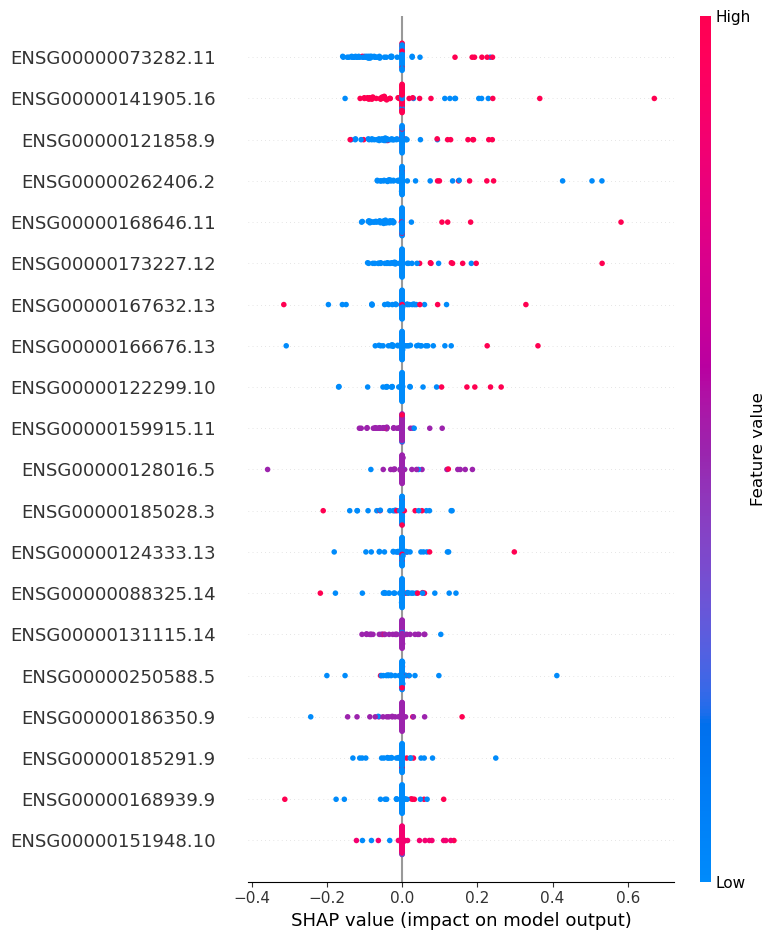

              col_name  feature_importance_vals
11  ENSG00000073282.11                 0.062651
56  ENSG00000141905.16                 0.053803
10   ENSG00000121858.9                 0.043981
39   ENSG00000262406.2                 0.041651
55  ENSG00000168646.11                 0.035025
..                 ...                      ...
8   ENSG00000169359.12                 0.006317
67  ENSG00000178605.11                 0.006305
64  ENSG00000078804.11                 0.003772
26  ENSG00000204576.10                 0.000830
27  ENSG00000204574.11                 0.000000

[77 rows x 2 columns]
sum shap 1.07501579652199
sum shap 1.0
[0.05827921999017089, 0.05004863258718218, 0.04091202937631803, 0.038744934698936265, 0.03258047598389403, 0.028947975563076843, 0.022628902474259107, 0.02195731798571521, 0.020387795175112487, 0.018460965790608755, 0.018247524170451397, 0.016575854306439583, 0.016223404573411964, 0.016149928433015697, 0.01568328398028173, 0.014838634670332612, 0.0141805531166

  0%|          | 0/85 [00:00<?, ?it/s]

Regressors in active set degenerate. Dropping a regressor, after 42 iterations, i.e. alpha=2.623e-04, with an active set of 28 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 44 iterations, i.e. alpha=1.982e-04, with an active set of 30 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 46 iterations, i.e. alpha=1.506e-04, with an active set of 32 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 51 iterations, alpha=1.319e-04, previous alpha=1.077e-04, with an active set of 34 regressors.
Early stopping the lars path, as the residues are small and the curr

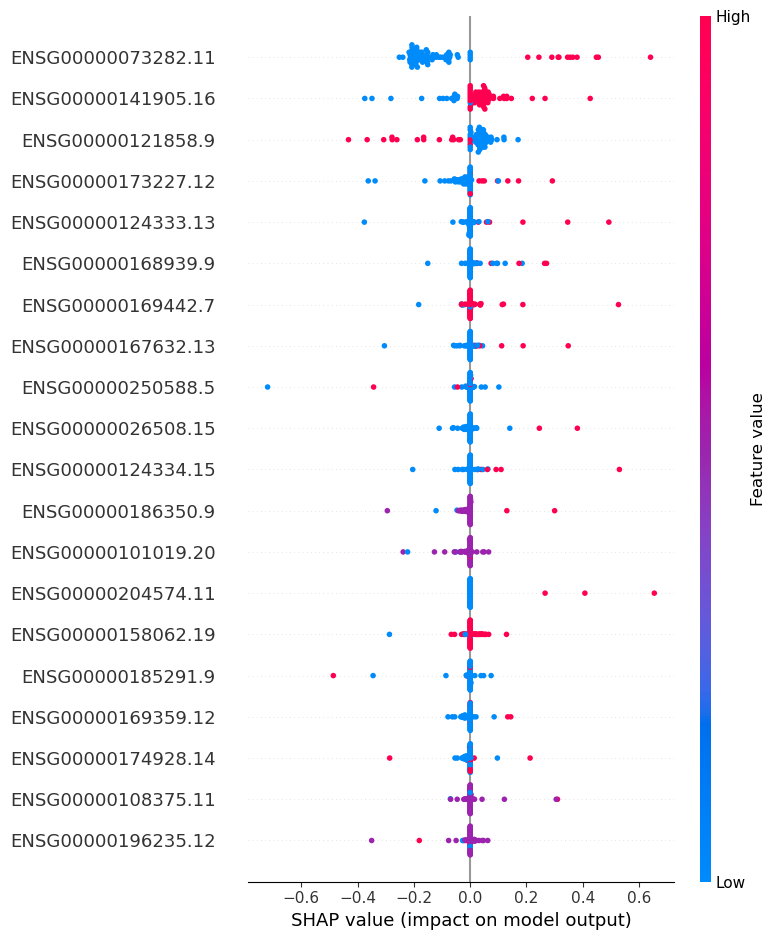

              col_name  feature_importance_vals
11  ENSG00000073282.11                 0.183986
56  ENSG00000141905.16                 0.067105
10   ENSG00000121858.9                 0.064910
38  ENSG00000173227.12                 0.037277
74  ENSG00000124333.13                 0.022280
..                 ...                      ...
23  ENSG00000188818.11                 0.004063
71  ENSG00000185960.11                 0.003449
16  ENSG00000073578.15                 0.003132
47  ENSG00000184507.14                 0.002744
19   ENSG00000164366.3                 0.002325

[77 rows x 2 columns]
sum shap 1.01555310240572
sum shap 1.0000000000000007
[0.1811684016977194, 0.06607741640582977, 0.06391627067071678, 0.0367060091737547, 0.021938550796469395, 0.020421906321848402, 0.017727589526404988, 0.017552655591745722, 0.01724353442698757, 0.016749550415689214, 0.016557360662760198, 0.015753089780770113, 0.015553058375032444, 0.015383156652241584, 0.014616633429523651, 0.013477746810682681, 0

  0%|          | 0/85 [00:00<?, ?it/s]

Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 64 iterations, alpha=1.746e-04, previous alpha=1.723e-04, with an active set of 43 regressors.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 24 iterations, alpha=1.291e-03, previous alpha=1.286e-03, with an active set of 19 regressors.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


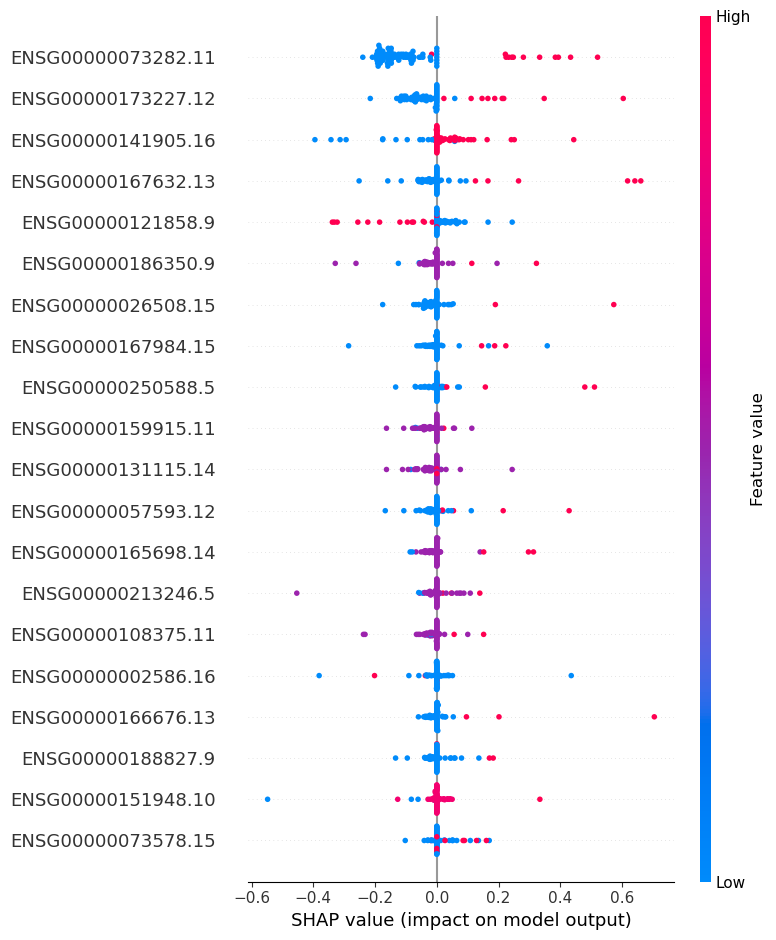

              col_name  feature_importance_vals
11  ENSG00000073282.11                 0.149327
38  ENSG00000173227.12                 0.069583
56  ENSG00000141905.16                 0.054172
28  ENSG00000167632.13                 0.049286
10   ENSG00000121858.9                 0.043834
..                 ...                      ...
12  ENSG00000028310.16                 0.006944
67  ENSG00000178605.11                 0.006758
63  ENSG00000088325.14                 0.005371
22   ENSG00000185028.3                 0.005222
32  ENSG00000171102.13                 0.005143

[77 rows x 2 columns]
sum shap 1.2947347776042843
sum shap 1.0000000000000002
[0.11533409247996225, 0.053743016820389254, 0.04184023491206862, 0.03806661389203792, 0.03385525388204155, 0.02166670080292523, 0.02157649593086492, 0.01943543850094207, 0.01924402167482778, 0.018066669587713916, 0.017613740064218744, 0.01703340881258512, 0.01700349531273307, 0.016209735629878402, 0.015345794577031694, 0.015145550677959415, 0.

  0%|          | 0/85 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


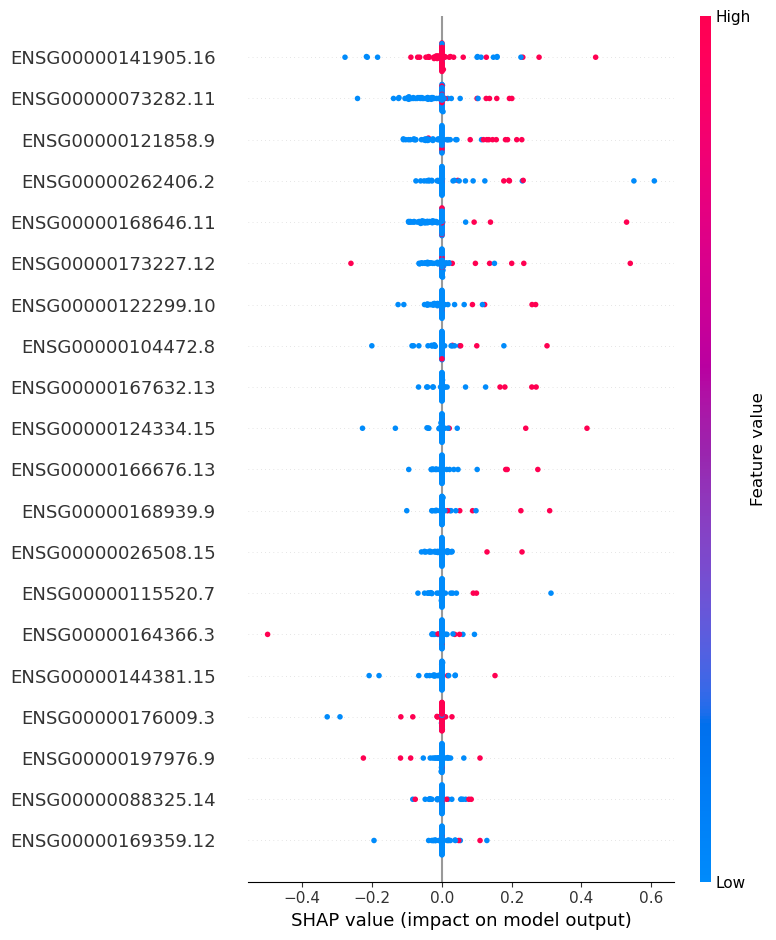

              col_name  feature_importance_vals
56  ENSG00000141905.16                 0.043522
11  ENSG00000073282.11                 0.043418
10   ENSG00000121858.9                 0.039208
39   ENSG00000262406.2                 0.036178
55  ENSG00000168646.11                 0.030766
..                 ...                      ...
33   ENSG00000186350.9                 0.003537
65  ENSG00000101019.20                 0.003439
64  ENSG00000078804.11                 0.003030
41   ENSG00000197595.3                 0.002262
25   ENSG00000249915.6                 0.002043

[77 rows x 2 columns]
sum shap 0.7985186010430094
sum shap 0.9999999999999996
[0.05450342149537561, 0.05437296260954011, 0.049100544067137694, 0.04530609571736325, 0.03852937567143328, 0.03561017477466344, 0.025592653658392618, 0.021532198821014085, 0.019263074517485577, 0.018450727633122728, 0.016776307970580478, 0.016343258832468004, 0.015500290029485188, 0.014226482510707805, 0.01400976920875213, 0.014008005233010228

  0%|          | 0/85 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


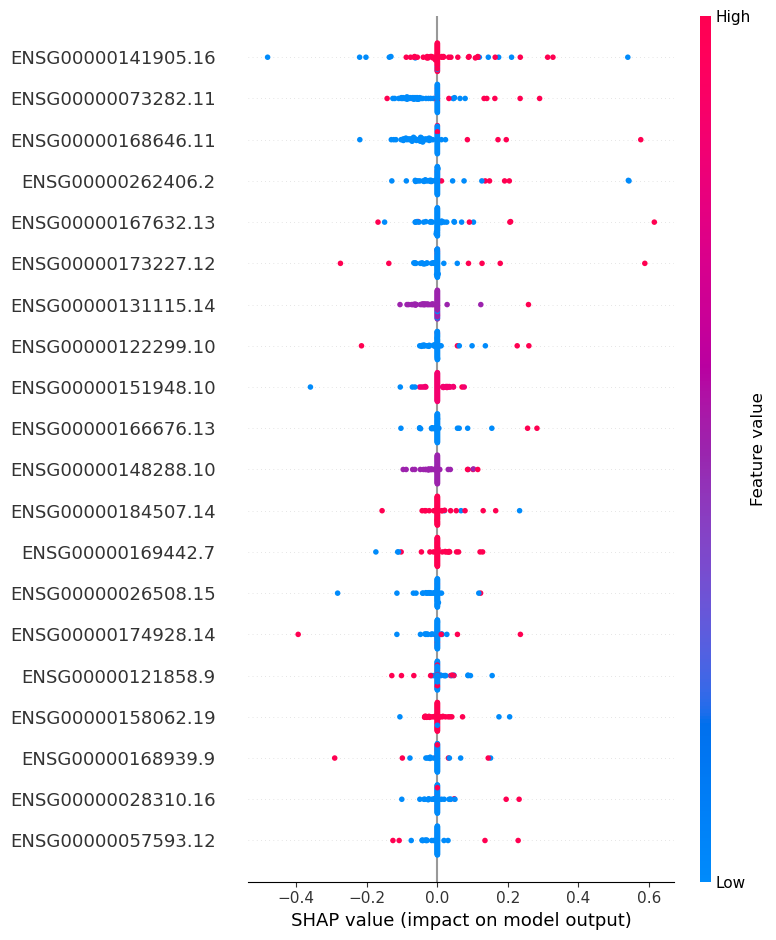

              col_name  feature_importance_vals
56  ENSG00000141905.16                 0.056011
11  ENSG00000073282.11                 0.045818
55  ENSG00000168646.11                 0.045128
39   ENSG00000262406.2                 0.033640
28  ENSG00000167632.13                 0.026191
..                 ...                      ...
19   ENSG00000164366.3                 0.003238
54  ENSG00000108375.11                 0.003220
58   ENSG00000128016.5                 0.002433
69  ENSG00000182378.11                 0.000937
64  ENSG00000078804.11                 0.000000

[77 rows x 2 columns]
sum shap 0.8129022126104701
sum shap 0.9999999999999997
[0.06890253900737672, 0.056362948630980805, 0.05551435161104846, 0.041382883491566276, 0.03221905770630536, 0.029631554286247908, 0.022987087239203074, 0.02261013389289626, 0.01910717733933188, 0.018111342140252527, 0.017534361565430673, 0.016480316930319833, 0.016375635127152666, 0.01566934547033996, 0.015609716838259029, 0.015590161878449154

  0%|          | 0/85 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


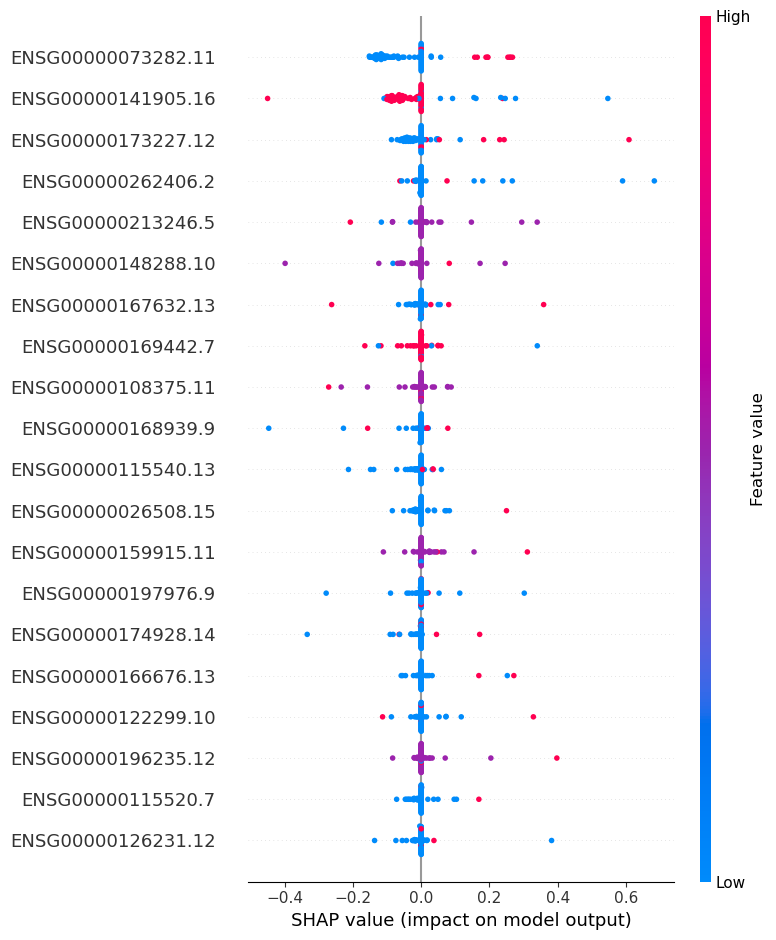

              col_name  feature_importance_vals
11  ENSG00000073282.11                 0.084300
56  ENSG00000141905.16                 0.063252
38  ENSG00000173227.12                 0.035881
39   ENSG00000262406.2                 0.028882
53   ENSG00000213246.5                 0.018099
..                 ...                      ...
19   ENSG00000164366.3                 0.004103
71  ENSG00000185960.11                 0.003972
10   ENSG00000121858.9                 0.003812
65  ENSG00000101019.20                 0.003483
64  ENSG00000078804.11                 0.000742

[77 rows x 2 columns]
sum shap 0.8259116354951601
sum shap 1.0000000000000002
[0.10206936753428729, 0.07658404308583484, 0.04344399534316963, 0.034969401524061826, 0.0219135909071703, 0.021522071465461198, 0.017980419245514967, 0.01789155661831299, 0.017526538956975056, 0.016495772757018655, 0.01575845027520218, 0.01574702232940917, 0.01539155195236597, 0.014804204734284083, 0.014529055064139623, 0.014296003870477319, 0

  0%|          | 0/85 [00:00<?, ?it/s]

Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=5.181e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Regressors in active set degenerate. Dropping a regressor, after 17 iterations, i.e. alpha=7.548e-03, with an active set of 13 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 74 iterations, alpha=3.511e-03, previous alpha=2.716e-03, with an active set of 41 regressors.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


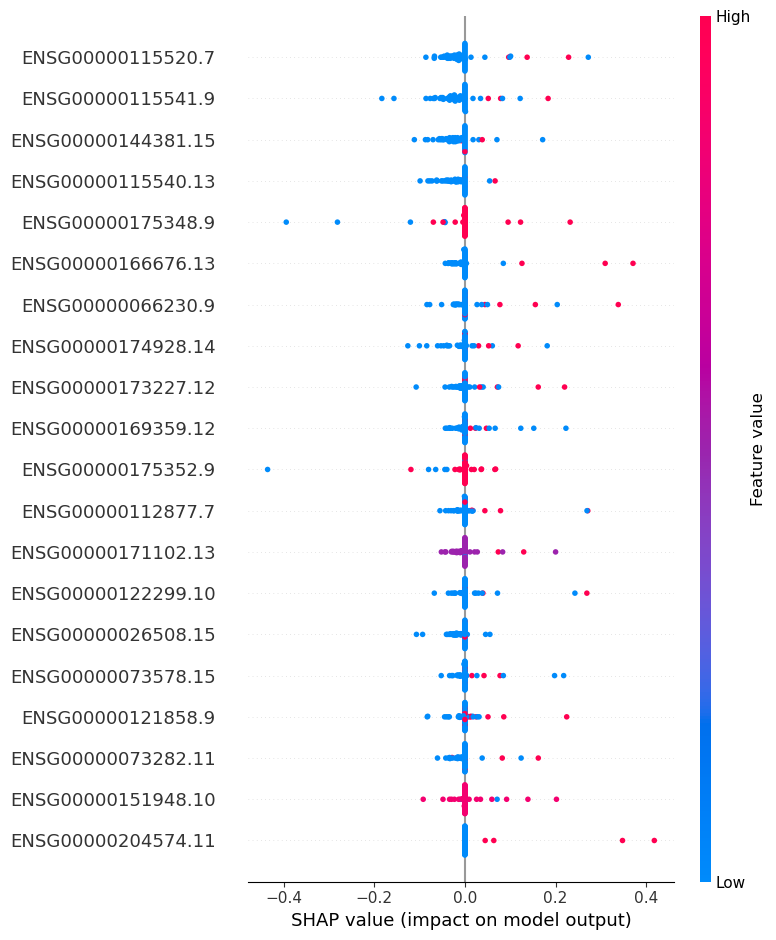

              col_name  feature_importance_vals
3    ENSG00000115520.7                 0.027906
5    ENSG00000115541.9                 0.026148
4   ENSG00000144381.15                 0.023142
6   ENSG00000115540.13                 0.018219
35   ENSG00000175348.9                 0.017958
..                 ...                      ...
25   ENSG00000249915.6                 0.004128
65  ENSG00000101019.20                 0.003355
63  ENSG00000088325.14                 0.003290
64  ENSG00000078804.11                 0.001223
47  ENSG00000184507.14                 0.000713

[77 rows x 2 columns]
sum shap 0.6916786445124168
sum shap 0.9999999999999998
[0.04034589128395048, 0.03780319269746463, 0.033457343893775124, 0.026339763445416744, 0.025963528847500642, 0.023829661501525164, 0.02259594078897297, 0.02069342470263961, 0.01942091870816359, 0.018894578380265432, 0.01848784825208896, 0.017945378572351685, 0.01774371288181113, 0.01666748452489509, 0.01613675626936824, 0.016119132258036656, 0

X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names


  0%|          | 0/85 [00:00<?, ?it/s]

X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have 

X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have 

X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have 

X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have 

X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have 

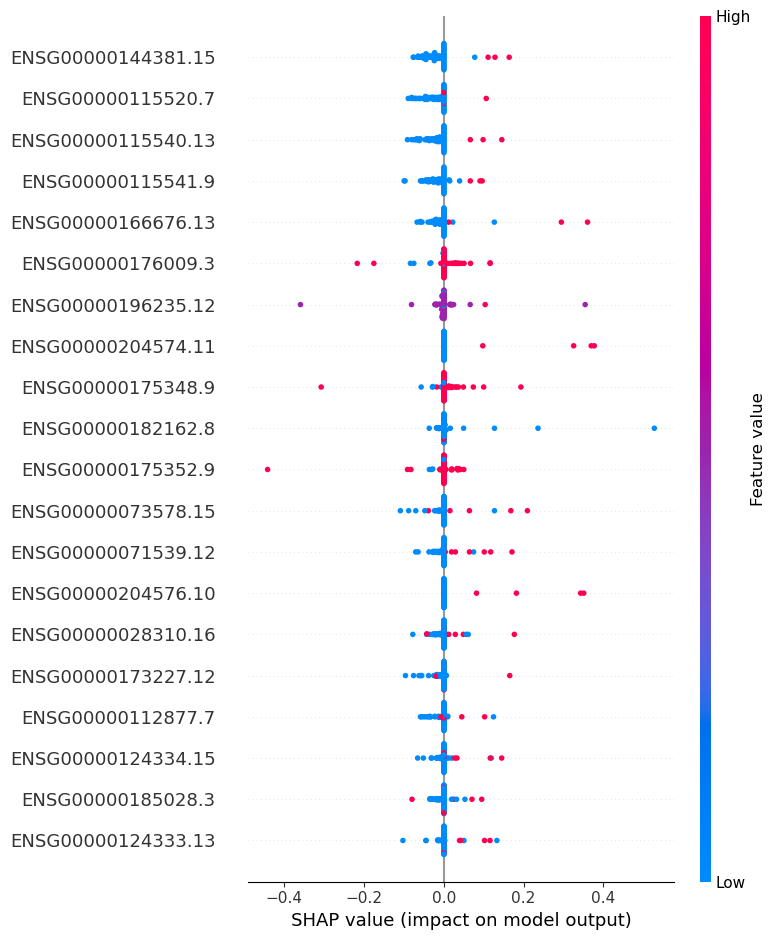

              col_name  feature_importance_vals
4   ENSG00000144381.15                 0.029151
3    ENSG00000115520.7                 0.022816
6   ENSG00000115540.13                 0.022739
5    ENSG00000115541.9                 0.020092
51  ENSG00000166676.13                 0.018786
..                 ...                      ...
63  ENSG00000088325.14                 0.003130
71  ENSG00000185960.11                 0.002617
11  ENSG00000073282.11                 0.002536
54  ENSG00000108375.11                 0.002152
64  ENSG00000078804.11                 0.000992

[77 rows x 2 columns]
sum shap 0.6297668105763029
sum shap 0.9999999999999993
[0.046287840263036104, 0.036229781244138524, 0.03610677617516032, 0.031904457087143664, 0.029830103649747884, 0.023732382487199978, 0.022525219565236218, 0.021846000738263864, 0.02077962110526057, 0.020728369000963153, 0.02018090788387321, 0.020101699617944037, 0.019581262801152646, 0.017877406348731018, 0.016233706712841328, 0.015832822633121

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


MLP: 0.763347 (0.033946)


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


  0%|          | 0/85 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


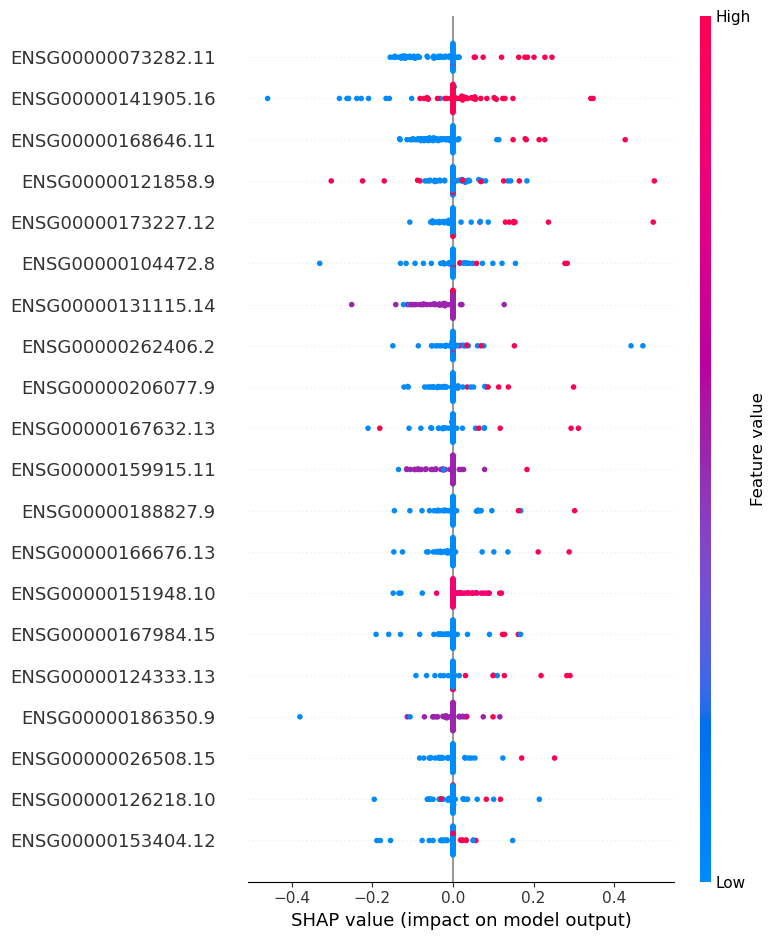

              col_name  feature_importance_vals
11  ENSG00000073282.11                 0.058825
56  ENSG00000141905.16                 0.058411
55  ENSG00000168646.11                 0.049665
10   ENSG00000121858.9                 0.040062
38  ENSG00000173227.12                 0.029038
..                 ...                      ...
69  ENSG00000182378.11                 0.005757
50   ENSG00000126602.9                 0.005729
32  ENSG00000171102.13                 0.005633
66  ENSG00000002586.16                 0.004564
19   ENSG00000164366.3                 0.003361

[77 rows x 2 columns]
sum shap 1.099669969830247
sum shap 0.9999999999999999
[0.05349376998106804, 0.053116781315465975, 0.04516313979980503, 0.036430834670325776, 0.026405870745552357, 0.02416760931763596, 0.024031824442326565, 0.021742270278677003, 0.020873181650730276, 0.020462919564821387, 0.019250539687698104, 0.018697289970122016, 0.01817121684935366, 0.017638321846262142, 0.016662276692665366, 0.01663182695578613

  0%|          | 0/85 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


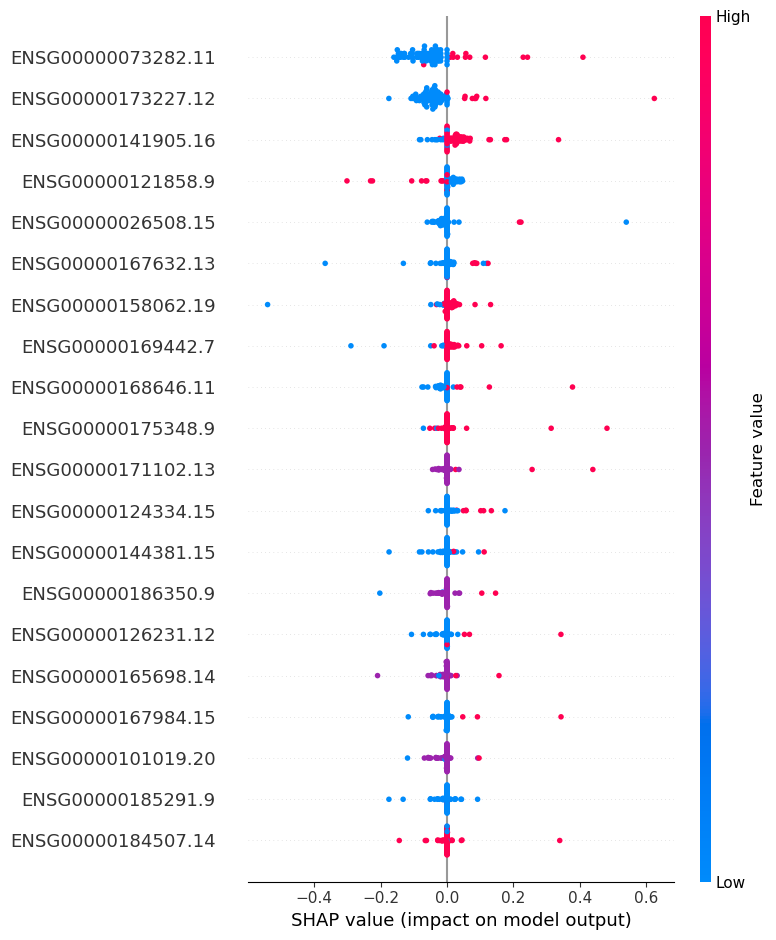

              col_name  feature_importance_vals
11  ENSG00000073282.11                 0.075703
38  ENSG00000173227.12                 0.056811
56  ENSG00000141905.16                 0.036387
10   ENSG00000121858.9                 0.025588
37  ENSG00000026508.15                 0.021580
..                 ...                      ...
31  ENSG00000148288.10                 0.004548
63  ENSG00000088325.14                 0.004365
27  ENSG00000204574.11                 0.004265
36   ENSG00000175352.9                 0.004018
26  ENSG00000204576.10                 0.002354

[77 rows x 2 columns]
sum shap 0.8041557747985041
sum shap 1.0
[0.09414004391323007, 0.07064725794961725, 0.04524881082635867, 0.03181944427482752, 0.026835989178264144, 0.023329740913378322, 0.02069721087683857, 0.019874184167072734, 0.019690226178812137, 0.017526755539048096, 0.01613740728533999, 0.01592997042323066, 0.015181258188008393, 0.015028671657894135, 0.014618179098842296, 0.01438683743224304, 0.0136419334275

  0%|          | 0/85 [00:00<?, ?it/s]

Linear regression equation is singular, Moore-Penrose pseudoinverse is used instead of the regular inverse.
To use regular inverse do one of the following:
1) turn up the number of samples,
2) turn up the L1 regularization with num_features(N) where N is less than the number of samples,
3) group features together to reduce the number of inputs that need to be explained.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


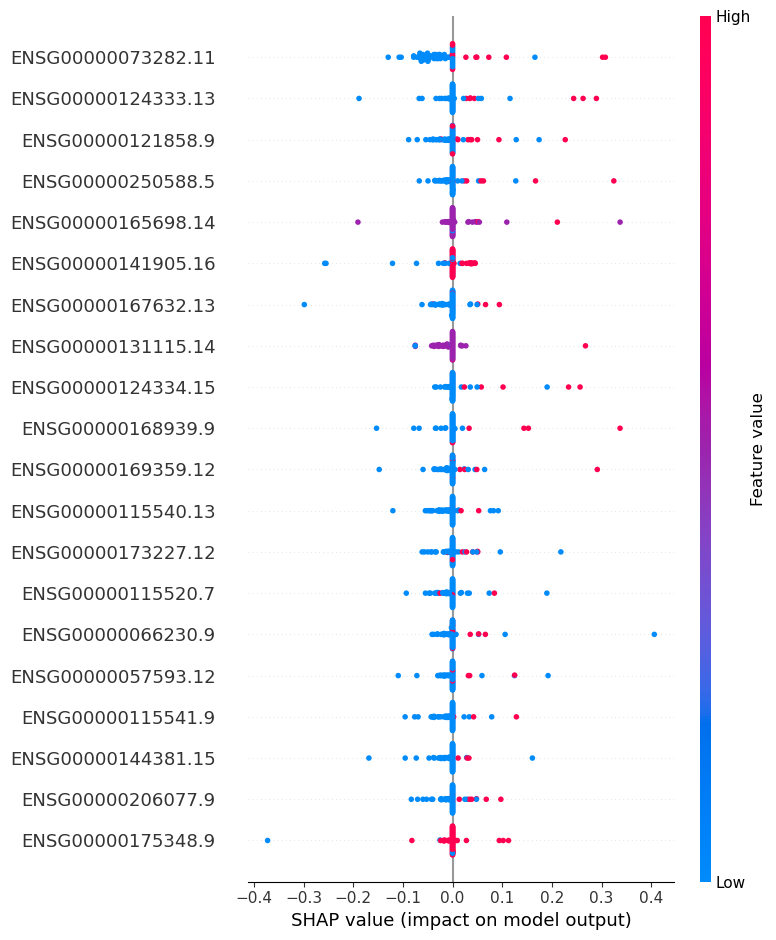

              col_name  feature_importance_vals
11  ENSG00000073282.11                 0.043441
74  ENSG00000124333.13                 0.019244
10   ENSG00000121858.9                 0.017884
9    ENSG00000250588.5                 0.015685
30  ENSG00000165698.14                 0.014644
..                 ...                      ...
69  ENSG00000182378.11                 0.003397
50   ENSG00000126602.9                 0.003292
27  ENSG00000204574.11                 0.001840
64  ENSG00000078804.11                 0.000769
26  ENSG00000204576.10                 0.000000

[77 rows x 2 columns]
sum shap 0.673259981206621
sum shap 0.9999999999999998
[0.06452409405252339, 0.02858354172882072, 0.026563206204218096, 0.023297686828686034, 0.021750704116974207, 0.021415199503653184, 0.020585839076262245, 0.020405986271450117, 0.019714011047132877, 0.01947627592545123, 0.019390583541932422, 0.019058534831642878, 0.018986040584005777, 0.018259156123651112, 0.018014581730766015, 0.0177091615985374

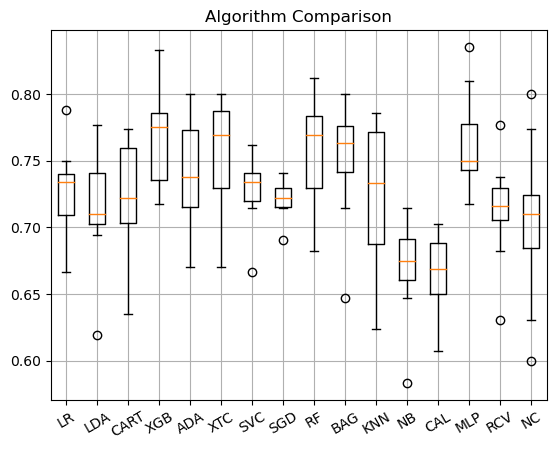

In [41]:
from sklearn import metrics
# evaluate each model in turn, but only with training data set using 10-fold CV
results = []
names = []
classifRep = []
resultsAll = []

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr', random_state = 0)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier(random_state = 0)))
models.append(('XGB', XGBClassifier(random_state = 0)))
models.append(('ADA', AdaBoostClassifier(n_estimators=100, random_state=0)))
models.append(('XTC', ExtraTreesClassifier(random_state = 0)))
# models.append(('PAC', PassiveAggressiveClassifier(random_state=0)))
models.append(('SVC', svm.SVC(kernel = 'linear', probability=True, random_state = 0)))
models.append(('SGD', SGDClassifier(max_iter=1000, tol=1e-3, random_state = 0, loss="log_loss")))
models.append(('RF', RandomForestClassifier(random_state = 0)))
models.append(('BAG', BaggingClassifier(DecisionTreeClassifier(), n_estimators=10, random_state=0)))

models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('CAL', CalibratedClassifierCV(GaussianNB(), cv=3)))
models.append(('MLP', MLPClassifier(random_state = 0)))
models.append(('RCV', RidgeClassifierCV()))
models.append(('NC', NearestCentroid()))

from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
import shap
from sklearn.preprocessing import MinMaxScaler

allFeatName = {}
overlap = {}

for name, model in models:
    
    model.fit(X_train, y_train.values.ravel())
    
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    if name == 'KNN':
        cv_results = cross_val_score(model, gistic.values, gisticLabel.values.ravel(), cv=kfold, scoring='accuracy')
    else:
        cv_results = cross_val_score(model, gistic, gisticLabel.values.ravel(), cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    resultsAll.append(cv_results.mean())
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
#     if name != 'PAC':
        
#         #plot - comment out for acc
#         ax = plt.gca()
#         y_pred_proba = model.predict_proba(X_test)[::,1]
#         fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#         auc = metrics.roc_auc_score(y_test, y_pred_proba)
#         plt.plot(fpr,tpr,label=name)
#         plt.legend(loc=4)
#         plt.title('ROC Curve Comparison')

    # Choose one of the following methods to summarize the background
    # Option 1: shap.sample
    background_summary = shap.sample(X_train, 25)  # Adjust the number of samples (K)
    # Option 2: shap.kmeans
    # background_summary = shap.kmeans(X_train, 100)  # Adjust the number of samples (K)

    if name == 'XGB':
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
    else:
        explainer = shap.KernelExplainer(model.predict, background_summary)
        shap_values = explainer.shap_values(X_test, nsamples=100)
        
    shap.summary_plot(shap_values,X_test)

    feature_names = X_train.columns

    rf_resultX = pd.DataFrame(shap_values, columns = feature_names)

    vals = np.abs(rf_resultX.values).mean(0)

    shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                      columns=['col_name','feature_importance_vals'])
    shap_importance.sort_values(by=['feature_importance_vals'],
                                   ascending=False, inplace=True)
    print(shap_importance)
    print('sum shap', sum(shap_importance['feature_importance_vals']))
    
    df = shap_importance['feature_importance_vals']
    
    df_scaled = [float(i)/sum(df) for i in df]
    
    shap_importance.drop('feature_importance_vals',  axis=1)
    shap_importance['feature_importance_vals'] = df_scaled
    
    print('sum shap', sum(shap_importance['feature_importance_vals']))

    # Print the scaled data
    print(df_scaled)
    
    shap_importance.drop('feature_importance_vals',  axis=1)
    shap_importance['feature_importance_vals'] = df_scaled

    # Print the scaled data
    print(df_scaled)
    
    for i in shap_importance['col_name']:
        if i not in overlap:
            overlap[i] = shap_importance.loc[shap_importance.col_name == i, 'feature_importance_vals'].values[0]
        else: 
            overlap[i] = overlap[i] + shap_importance.loc[shap_importance.col_name == i, 'feature_importance_vals'].values[0]
    overlapSort = sorted(overlap.items(), key=lambda x:x[1], reverse=True)
    
from matplotlib import pyplot
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.xticks(rotation=30)
pyplot.grid()
pyplot.show()

In [42]:
resultsAll

[0.7277591036414567,
 0.7170728291316527,
 0.7243277310924371,
 0.7669467787114845,
 0.7407703081232493,
 0.7550560224089635,
 0.7277731092436974,
 0.7218627450980393,
 0.7585994397759104,
 0.7526890756302521,
 0.7242997198879552,
 0.6710084033613446,
 0.6674929971988797,
 0.7633473389355742,
 0.713529411764706,
 0.7041596638655462]

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                1248      
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
61/61 [==============================] - 1s 7ms/step - loss: 0.6910 - accuracy: 0.6414 - val_loss: 0.6749 - val_accuracy: 0.6316
Epoch 2/80
61/61 [==============================] - 0s 3ms/step - loss: 0.6592 - accuracy: 0.7105 - val_loss: 0.6603 - val_accuracy: 0.7039
Epoch 3/80
61/61 [==================

  0%|          | 0/85 [00:00<?, ?it/s]

79/79 [==============================] - 0s 2ms/step


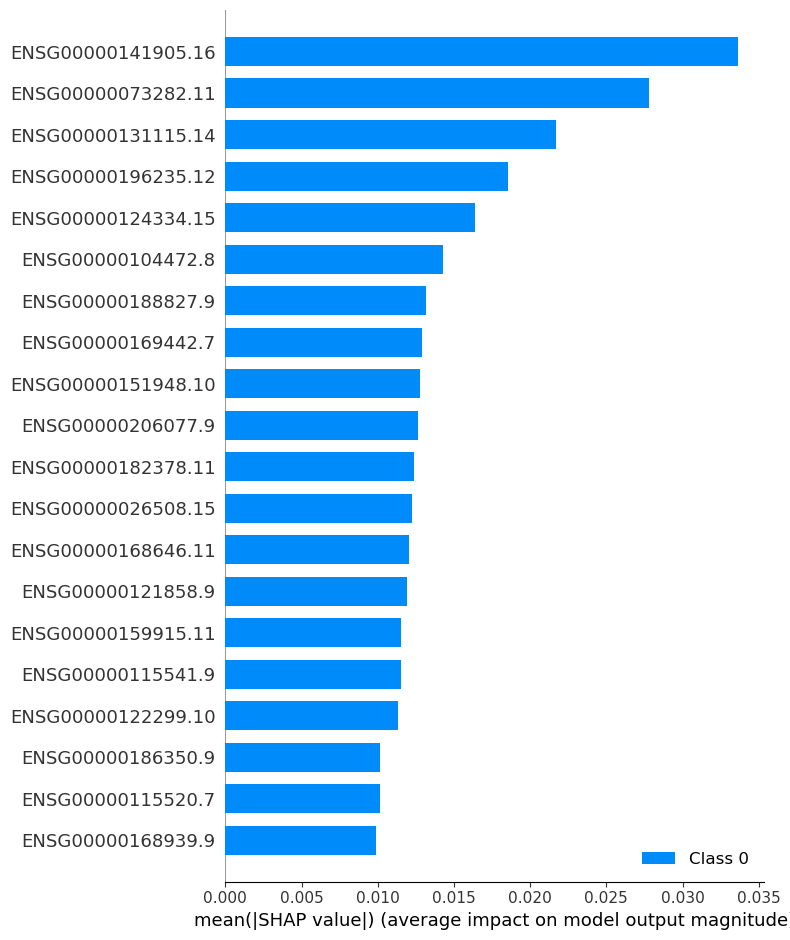

              col_name  feature_importance_vals
46   ENSG00000182117.5                 0.025933
32  ENSG00000171102.13                 0.023566
49   ENSG00000188827.9                 0.021836
21  ENSG00000180104.14                 0.017837
67  ENSG00000178605.11                 0.014609
..                 ...                      ...
27  ENSG00000204574.11                 0.004500
28  ENSG00000167632.13                 0.004471
40  ENSG00000151948.10                 0.004340
15  ENSG00000071539.12                 0.004255
4   ENSG00000144381.15                 0.003869

[77 rows x 2 columns]
sum shap 0.6529533209391801
sum shap 0.9999999999999991
[0.039716043902436944, 0.03609101967195788, 0.03344150489124955, 0.027316744619322174, 0.022374340545425805, 0.021982280968886894, 0.019701223254801725, 0.019670318394373887, 0.018623114499011995, 0.018268148692851312, 0.018214981385485458, 0.01784413163913332, 0.01760719554394756, 0.016936368558873486, 0.016866916073043494, 0.0163075062206779

In [43]:
    from keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from keras.callbacks import EarlyStopping

    model = Sequential()
    model.add(Dense(16, input_shape=(X_train.shape[1],), activation='relu')) # Add an input shape! (features,)
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()

    # compile the model
    model.compile(optimizer='Adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    es = EarlyStopping(monitor='val_accuracy',
                                       mode='max',
                                       patience=10,
                                       restore_best_weights=True)
    
    history = model.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=80,
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

    import shap
    # Choose one of the following methods to summarize the background
    # Option 1: shap.sample
    background_summary = shap.sample(X_train, 25)  # Adjust the number of samples (K)
    # Option 2: shap.kmeans
    # background_summary = shap.kmeans(X_train, 100)  # Adjust the number of samples (K)

    explainer = shap.KernelExplainer(model.predict, background_summary)
    shap_values = explainer.shap_values(X_test, nsamples=100)
    
    shap.summary_plot(shap_values,X_test)
    
    annShap = []
    for i in shap_values:
        for j in i:
            annShap.append(np.mean(abs(j)))
    vals = annShap

    feature_names = X_train.columns

    shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                      columns=['col_name','feature_importance_vals'])
    shap_importance.sort_values(by=['feature_importance_vals'],
                                   ascending=False, inplace=True)
    print(shap_importance)
    print('sum shap', sum(shap_importance['feature_importance_vals']))
    
    df = shap_importance['feature_importance_vals']
    
    df_scaled = [float(i)/sum(df) for i in df]
    
    shap_importance.drop('feature_importance_vals',  axis=1)
    shap_importance['feature_importance_vals'] = df_scaled
    
    print('sum shap', sum(shap_importance['feature_importance_vals']))

    # Print the scaled data
    print(df_scaled)
    
    shap_importance.drop('feature_importance_vals',  axis=1)
    shap_importance['feature_importance_vals'] = df_scaled

    # Print the scaled data
    print(df_scaled)
    
    for i in shap_importance['col_name']:
        if i not in overlap:
            overlap[i] = shap_importance.loc[shap_importance.col_name == i, 'feature_importance_vals'].values[0]
        else: 
            overlap[i] = overlap[i] + shap_importance.loc[shap_importance.col_name == i, 'feature_importance_vals'].values[0]
    overlapSort = sorted(overlap.items(), key=lambda x:x[1], reverse=True)

In [44]:
aveFeatVal = pd.DataFrame(overlapSort, columns=['gene', 'val'])
aveFeatVal

,gene,val
0,ENSG00000073282.11,1.288732
1,ENSG00000141905.16,0.802275
2,ENSG00000173227.12,0.584209
3,ENSG00000121858.9,0.545906
4,ENSG00000262406.2,0.409374
...,...,...
72,ENSG00000185960.11,0.128365
73,ENSG00000126602.9,0.125786
74,ENSG00000164366.3,0.122119
75,ENSG00000204574.11,0.119421


In [45]:
aveFeatVal['val'] = aveFeatVal['val'] / 18
aveFeatVal

,gene,val
0,ENSG00000073282.11,0.071596
1,ENSG00000141905.16,0.044571
2,ENSG00000173227.12,0.032456
3,ENSG00000121858.9,0.030328
4,ENSG00000262406.2,0.022743
...,...,...
72,ENSG00000185960.11,0.007131
73,ENSG00000126602.9,0.006988
74,ENSG00000164366.3,0.006784
75,ENSG00000204574.11,0.006634


In [40]:
# from sklearn.metrics import classification_report
# ANN_pred=model.predict(X_test)
# ANN_predictions = np.round(ANN_pred)
# print(classification_report(y_test,ANN_predictions))

In [ ]:
# import lime 
# from lime import lime_tabular
# lime_explainer = lime_tabular.LimeTabularExplainer(
#     training_data=np.array(X_train),
#     feature_names=X_train.columns,
#     class_names=['CESC', 'UCEC'],
#     mode='classification'
# )
# lime_exp = lime_explainer.explain_instance(
#     data_row=test_1,
#     predict_fn=model.predict_proba
# )
# lime_exp.show_in_notebook(show_table=True)

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot

model = XGBClassifier()

# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]

# fit the model
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)

# evaluate performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)

# retrieve performance metrics
results = model.evals_result()

# plot learning curves
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

X, y = gistic, gisticLabel

naive_bayes = GaussianNB()
svc = SVC(kernel="rbf", gamma=0.001)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([naive_bayes, svc]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

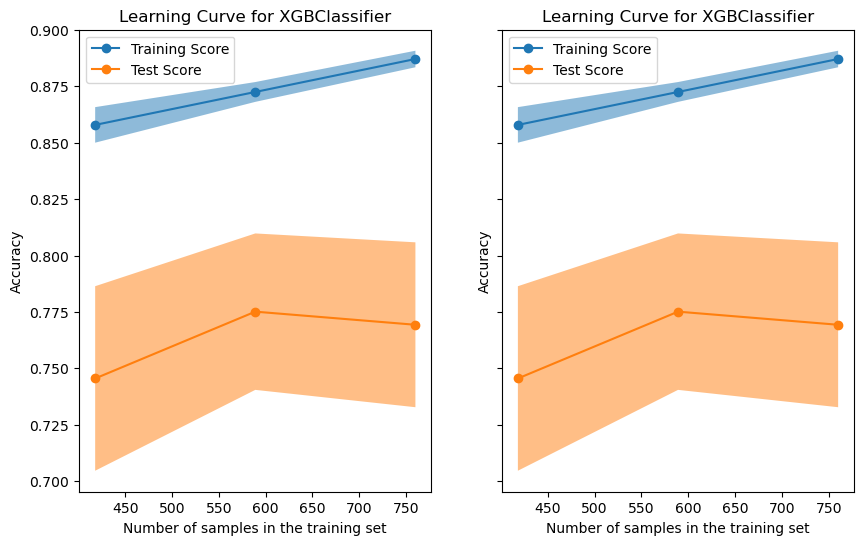

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

X, y = gistic, gisticLabel

naive_bayes = XGBClassifier()
svc = XGBClassifier()

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([naive_bayes, svc]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

[0]	validation_0-error:0.35132	validation_1-error:0.35294
[1]	validation_0-error:0.28158	validation_1-error:0.36471
[2]	validation_0-error:0.25263	validation_1-error:0.35294
[3]	validation_0-error:0.23421	validation_1-error:0.36471
[4]	validation_0-error:0.22105	validation_1-error:0.36471
[5]	validation_0-error:0.21184	validation_1-error:0.35294
[6]	validation_0-error:0.20132	validation_1-error:0.35294
[7]	validation_0-error:0.19079	validation_1-error:0.34118
[8]	validation_0-error:0.18553	validation_1-error:0.34118
[9]	validation_0-error:0.18026	validation_1-error:0.35294
[10]	validation_0-error:0.18289	validation_1-error:0.34118
[11]	validation_0-error:0.18421	validation_1-error:0.34118
[12]	validation_0-error:0.17763	validation_1-error:0.34118
[13]	validation_0-error:0.17105	validation_1-error:0.35294
[14]	validation_0-error:0.16974	validation_1-error:0.35294
[15]	validation_0-error:0.16842	validation_1-error:0.36471
[16]	validation_0-error:0.16842	validation_1-error:0.36471
[17]	va

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[75]	validation_0-error:0.11316	validation_1-error:0.30588
[76]	validation_0-error:0.11316	validation_1-error:0.30588
[77]	validation_0-error:0.11447	validation_1-error:0.30588
[78]	validation_0-error:0.11447	validation_1-error:0.30588
[79]	validation_0-error:0.11184	validation_1-error:0.30588
[80]	validation_0-error:0.11316	validation_1-error:0.30588
[81]	validation_0-error:0.11579	validation_1-error:0.30588
[82]	validation_0-error:0.11184	validation_1-error:0.29412
[83]	validation_0-error:0.11316	validation_1-error:0.29412
[84]	validation_0-error:0.11184	validation_1-error:0.30588
[85]	validation_0-error:0.10921	validation_1-error:0.29412
[86]	validation_0-error:0.10921	validation_1-error:0.29412
[87]	validation_0-error:0.11184	validation_1-error:0.30588
[88]	validation_0-error:0.11184	validation_1-error:0.30588
[89]	validation_0-error:0.11184	validation_1-error:0.30588
[90]	validation_0-error:0.11053	validation_1-error:0.30588
[91]	validation_0-error:0.11184	validation_1-error:0.317

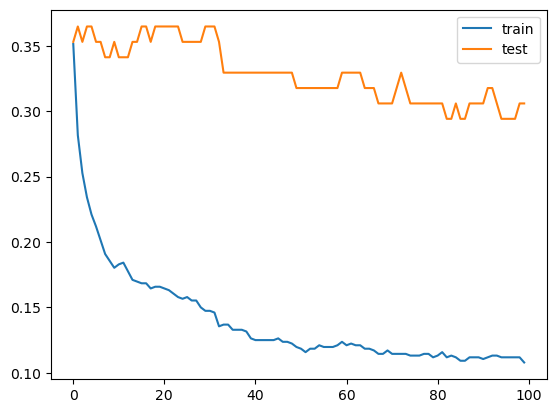

In [50]:
# plot learning curve of an xgboost model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot

model = XGBClassifier()
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
# fit the model
model.fit(X_train, y_train, eval_metric='error', eval_set=evalset)
# evaluate performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['error'], label='train')
pyplot.plot(results['validation_1']['error'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

[0]	validation_0-auc:0.68040	validation_1-auc:0.55364
[1]	validation_0-auc:0.73975	validation_1-auc:0.59606
[2]	validation_0-auc:0.79775	validation_1-auc:0.60758
[3]	validation_0-auc:0.81690	validation_1-auc:0.63788
[4]	validation_0-auc:0.82479	validation_1-auc:0.66818
[5]	validation_0-auc:0.82739	validation_1-auc:0.66121
[6]	validation_0-auc:0.83348	validation_1-auc:0.68303
[7]	validation_0-auc:0.84796	validation_1-auc:0.69121
[8]	validation_0-auc:0.84857	validation_1-auc:0.68758
[9]	validation_0-auc:0.85833	validation_1-auc:0.69303
[10]	validation_0-auc:0.86012	validation_1-auc:0.71000
[11]	validation_0-auc:0.86339	validation_1-auc:0.70636
[12]	validation_0-auc:0.86494	validation_1-auc:0.71424
[13]	validation_0-auc:0.86618	validation_1-auc:0.71212
[14]	validation_0-auc:0.86763	validation_1-auc:0.71273
[15]	validation_0-auc:0.87008	validation_1-auc:0.71636
[16]	validation_0-auc:0.86984	validation_1-auc:0.71636
[17]	validation_0-auc:0.87086	validation_1-auc:0.71697
[18]	validation_0-au

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[84]	validation_0-auc:0.91556	validation_1-auc:0.71333
[85]	validation_0-auc:0.91608	validation_1-auc:0.70970
[86]	validation_0-auc:0.91681	validation_1-auc:0.71273
[87]	validation_0-auc:0.91664	validation_1-auc:0.71152
[88]	validation_0-auc:0.91728	validation_1-auc:0.71091
[89]	validation_0-auc:0.91747	validation_1-auc:0.71152
[90]	validation_0-auc:0.91742	validation_1-auc:0.71212
[91]	validation_0-auc:0.91752	validation_1-auc:0.71212
[92]	validation_0-auc:0.91760	validation_1-auc:0.71212
[93]	validation_0-auc:0.91797	validation_1-auc:0.71273
[94]	validation_0-auc:0.91812	validation_1-auc:0.71333
[95]	validation_0-auc:0.91819	validation_1-auc:0.71515
[96]	validation_0-auc:0.91872	validation_1-auc:0.71455
[97]	validation_0-auc:0.91852	validation_1-auc:0.71455
[98]	validation_0-auc:0.91898	validation_1-auc:0.73212
[99]	validation_0-auc:0.91904	validation_1-auc:0.73273
Accuracy: 0.694


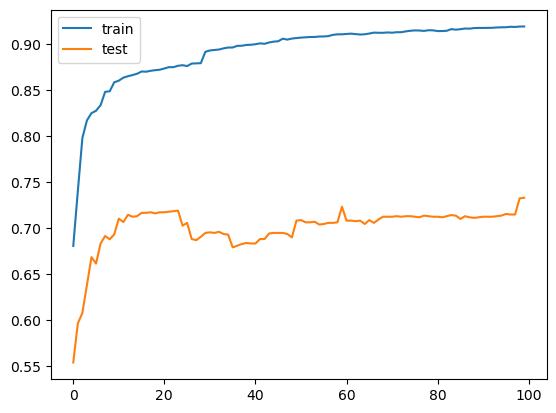

In [53]:
# plot learning curve of an xgboost model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from matplotlib import pyplot

model = XGBClassifier()
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
# fit the model
model.fit(X_train, y_train, eval_metric='auc', eval_set=evalset)
# evaluate performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['auc'], label='train')
pyplot.plot(results['validation_1']['auc'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()